In [1]:
import pandas as pd
from datapreprocessfunction_code import function_process, readfile, rename_cols,annon,outers_join,add_column,label_paths
import seaborn as sns
from matplotlib import pyplot as plt
import os
import numpy as np
from plots_functions import plot3d
from collections import OrderedDict
import cmath
from sklearn.decomposition import PCA


<Figure size 576x720 with 0 Axes>

In [2]:
add_column

<function datapreprocessfunction_code.add_column(df, lists, string, newcolname)>

In [12]:
def fill_nans(x,col1,col2):
    if pd.isnull(x[col1]):
        return x[col2]
    else:
        return x[col1]


def shannon(col):
    entropy = - sum([ p * math.log(p) / math.log(2.0) for p in col])
    return entropy

In [16]:
cols = ['Correlation','Pvalue','Gene_id_pc','Gene_id_lncRNAs','FDR']

def readfile_correlations(path,filename):
    df = pd.read_csv(path+filename,header=0,sep='\t',skipinitialspace=True,names=cols)
    return df

Paths and reading the files

In [2]:
path          = '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/lncRNAs2target/lncRNA_target_from_low_throughput_experiments.xlsx'
BRCA_GSEA_pos = '/home/alva/Documents/lncRNAs_project_2020/scripts/'
BRCA_GSEA     = '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/correlation/'
BRCA          = '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/'
somatic       = '/home/alva/Documents/lncRNAs_project_2020/'
BRCA_meta     = '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/filtered_results/'
sample_meta   = '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/metadata/'
subtypes      = '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/autoencoder_lncRNAs/data/brca_suntypes/'
matrix        = '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/matrix/'
enchancer     = '/home/alva/Documents/kaggle/'
somatic       = '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/BRCA/87ac6b5b-806e-4de0-b8d8-ae6888759667/'
clinical      = '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/clinical/'
sphase        = '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/Sphase_lncRNAs/'


In [3]:
ouput     = '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/output/plots/'

In [4]:
basallike = pd.read_pickle(subtypes+"Basallike_subtype.pkl")

In [5]:
HER2     = pd.read_pickle(subtypes+"HER2enriched_subtype.pkl")
LumalA   = pd.read_pickle(subtypes+"LuminalA_subtype.pkl")

In [6]:

normallike = pd.read_pickle(subtypes+"Normallike_subtype.pkl")
LuminalB   = pd.read_pickle(subtypes+"LuminalB_subtype.pkl")

In [7]:
basal         =  pd.DataFrame(basallike.columns)
basal["type"] = "Basal"
HER2_cols     = pd.DataFrame(HER2.columns)
HER2_cols["type"] = "Her2"
LumalA_cols       = pd.DataFrame(LumalA.columns)
LumalA_cols["type"] = "LumA"
normallike_cols     = pd.DataFrame(normallike.columns)
normallike_cols["type"] = "normallike"
LuminalB_cols           = pd.DataFrame(LuminalB.columns)
LuminalB_cols["type"]   = "LumB"

In [8]:
subtypes_cols = pd.concat([LuminalB_cols,normallike_cols,LumalA_cols,HER2_cols,basal])
subtypes_cols = rename_cols(subtypes_cols,0,"barcode")

In [13]:
sample_metadata = readfile(sample_meta,"TCGA-BRCA_metadata")
sample_metadata_subtypes = outers_join(sample_metadata,subtypes_cols,"barcode")
sample_metadata_subtypes['type'] = sample_metadata_subtypes.apply(lambda x : fill_nans(x,'type','sample_type'),axis=1)

In [ ]:
%store sample_metadata_subtypes

In [17]:
excel                      = pd.read_excel(path)
low_through_put_lncRNAs    = excel[["lncRNA_name_from_paper","LncRNA_official_symbol","Target_official_symbol","Cell_Line","Disease_state"]]
pathways_inpos_correlation = readfile(BRCA_GSEA,"postive_signalling_pathway_BRCA")
brca_de           = readfile(BRCA,"lncRNA_0.58_TCGA-BRCA_DE")
brca_meta         = readfile(BRCA_meta,"BRCA_metainformation")
%store -r data
#data.drop('logFC',axis =1,inplace=True)
Correlation_BRCA_GSEA            = readfile_correlations(BRCA_GSEA_pos,"BRCA_cancer_gene_pos_045_cor") 
pathways_inpos_correlation_genes = function_process(pathways_inpos_correlation,"intersections")
pathways_inpos_correlation_genes = rename_cols(pathways_inpos_correlation_genes,"intersections","Gene_id_pc")
matrix_brca       = readfile(matrix, "TCGA-BRCA.tsv")
driver_mutations2 = readfile(somatic,"gsc_BRCA_pairs.aggregated.capture.tcga.uuid.automated.somatic_cols.maf")
clinical_brca     = readfile(clinical,"Human__TCGA_BRCA__MS__Clinical__Clinical__01_28_2016__BI__Clinical__Firehose.tsi")
sphase_lncRNAs    = readfile(sphase,"Sphase_TCGA")

/home/alva/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [18]:
pathways_inpos_correlation_genes.head()

,term_name,Gene_id_pc
0,PI3K-Akt signaling pathway,ENSG00000077782
1,PI3K-Akt signaling pathway,ENSG00000078579
2,PI3K-Akt signaling pathway,ENSG00000081052
3,PI3K-Akt signaling pathway,ENSG00000101049
4,PI3K-Akt signaling pathway,ENSG00000101280


In [ ]:
brca_all_de           = readfile(BRCA,"Annon_0.58_TCGA-BRCA_DE")

In [20]:
selection      = ["PAM50", "ER.Status","PR.Status","radiation_therapy"]
subtypes_bra   = clinical_brca[pd.DataFrame(clinical_brca.attrib_name.tolist()).isin(selection).any(1).values]
subtypes_bra_m = subtypes_bra.set_index('attrib_name').transpose()
subtypes_bra_m.reset_index(inplace =True)
subtypes_bra_m = rename_cols(subtypes_bra_m,"index","barcode")
subtypes_bra_m['barcode'] = subtypes_bra_m['barcode'].str.replace('.','-')
subtypes_bra_m = rename_cols(subtypes_bra_m,"barcode","sample")

/home/alva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [21]:
sample_metadata_subtypes[["sample"]]=sample_metadata_subtypes['barcode'].str.rsplit('-',n=4,expand=True)[0]
sample_metadata_subtypes_clinical   = annon(sample_metadata_subtypes,"sample",subtypes_bra_m)
comparison_column                   = np.where(sample_metadata_subtypes_clinical["PAM50"] == sample_metadata_subtypes_clinical["type"], True, False)
sample_metadata_subtypes_clinical["equal"] = comparison_column
sample_metadata_subtypes_clinical_pheno    = sample_metadata_subtypes_clinical.query('equal==True')
sample_metadata_subtypes_clinical_pheno

,barcode,project_id,sample_type,tissue_or_organ_of_origin,type,sample,PAM50,ER.Status,PR.Status,radiation_therapy,equal
0,TCGA-A2-A0EN-01A-13R-A084-07,TCGA-BRCA,Primary Tumor,"Breast, NOS",LumA,TCGA-A2-A0EN,LumA,NaN,NaN,yes,True
3,TCGA-BH-A1FH-01A-12R-A13Q-07,TCGA-BRCA,Primary Tumor,"Breast, NOS",LumA,TCGA-BH-A1FH,LumA,NaN,NaN,NaN,True
4,TCGA-E2-A1IN-01A-11R-A13Q-07,TCGA-BRCA,Primary Tumor,"Breast, NOS",LumA,TCGA-E2-A1IN,LumA,NaN,NaN,yes,True
6,TCGA-E2-A14P-01A-31R-A12D-07,TCGA-BRCA,Primary Tumor,"Breast, NOS",Her2,TCGA-E2-A14P,Her2,NaN,NaN,yes,True
11,TCGA-A7-A13E-01A-11R-A12P-07,TCGA-BRCA,Primary Tumor,"Breast, NOS",Basal,TCGA-A7-A13E,Basal,NaN,NaN,no,True
...,...,...,...,...,...,...,...,...,...,...,...
1210,TCGA-D8-A147-01A-11R-A115-07,TCGA-BRCA,Primary Tumor,"Breast, NOS",Basal,TCGA-D8-A147,Basal,NaN,NaN,yes,True
1214,TCGA-E2-A15O-01A-11R-A115-07,TCGA-BRCA,Primary Tumor,"Breast, NOS",LumA,TCGA-E2-A15O,LumA,NaN,NaN,no,True
1215,TCGA-C8-A12P-01A-11R-A115-07,TCGA-BRCA,Primary Tumor,"Breast, NOS",Her2,TCGA-C8-A12P,Her2,Negative,Negative,no,True
1216,TCGA-OL-A66K-01A-11R-A29R-07,TCGA-BRCA,Primary Tumor,"Breast, NOS",LumA,TCGA-OL-A66K,LumA,NaN,NaN,no,True


In [45]:
sample_metadata_subtypes_clinical_pheno.query('barcode =="TCGA-A2-A0EN-01A-13R-A084-07"')
#sample_metadata.sample_type.drop_duplicates()

,barcode,project_id,sample_type,tissue_or_organ_of_origin,type,sample,PAM50,ER.Status,PR.Status,radiation_therapy,equal
0,TCGA-A2-A0EN-01A-13R-A084-07,TCGA-BRCA,Primary Tumor,"Breast, NOS",LumA,TCGA-A2-A0EN,LumA,NaN,NaN,yes,True


In [43]:
sample_metadata_subtypes_clinical_pheno.to_csv("/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/clinical/sample_metadata_subtypes_clinical_pheno",sep='\t',index=False)

In [42]:
sample_metadata.to_csv("/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/clinical/sample_metadata",sep='\t',index=False)

In [ ]:
SE_breast           = readfile(enchancer,"Sample_01_072_SE.bed")
SE                  = pd.DataFrame(SE_breast["proximal gene"])
SE['proximal gene'].drop_duplicates(inplace=True)
SE = SE.assign(gene_sym=SE['proximal gene'].str.split(',')).explode('gene_sym')
#SE_ann =rename_cols(SE,"closest active gene","gene_sym")
SE_ann = annon(brca_de[["gene_sym"]],"gene_sym",SE[["gene_sym"]])
SE_ann

BRCA somatic mutations

In [ ]:
from scipy.stats import fisher_exact
def somaticP(NormalRef, NormalAlt, TumorRef, TumorAlt):
    contingency_table = [[NormalRef,NormalAlt],[TumorRef,TumorAlt]]
    return min(fisher_exact(contingency_table, alternative='less')[1], fisher_exact(contingency_table, alternative='greater')[1])

In [ ]:
driver_mutations2

In [32]:
driver_mutations2     = rename_cols(driver_mutations2,"Hugo_Symbol","gene_sym")
driver_mutations2_lnc = annon(driver_mutations2,"gene_sym",brca_de[["gene_sym","logFC"]])
mask                  = (driver_mutations2_lnc['t_alt_count'] != 0) | (driver_mutations2_lnc['t_ref_count'] != 0)
driver_mutations2_lnc.loc[mask, 'vaf'] = driver_mutations2_lnc['t_alt_count']/(driver_mutations2_lnc['t_alt_count']+driver_mutations2_lnc['t_ref_count'])
mutations_BRCA     = driver_mutations2_lnc[["Tumor_Sample_Barcode","gene_sym","vaf","Variant_Type"]]
mutations_BRCA_agg = (mutations_BRCA.groupby(['gene_sym','Tumor_Sample_Barcode'])
                      .agg({ 'Variant_Type' : ','.join,'vaf':"mean"})
                      .reset_index().reindex(columns=mutations_BRCA.columns))

mutations_BRCA_agg      = rename_cols(mutations_BRCA_agg,"Tumor_Sample_Barcode","barcode")
mutations_BRCA_agg[["sample"]] = mutations_BRCA_agg['barcode'].str.rsplit('-',n=4,expand=True)[0]
mutations_BRCA_agg_clin = annon(mutations_BRCA_agg,"sample",sample_metadata_subtypes_clinical_pheno[["type","sample","ER.Status","PR.Status"]])
mutations_BRCA_agg_clin = annon(mutations_BRCA_agg_clin,"gene_sym",brca_de[["gene_sym","logFC"]])

In [35]:
mutations_BRCA_agg["type"]      = "somatic"
somatic_mutated_samples         = mutations_BRCA_agg.barcode.drop_duplicates().to_list()
sample_metadata_subtypes['mut'] = np.where(sample_metadata_subtypes['barcode'].isin(somatic_mutated_samples),'somatic_mut','No')
sample_metadata_subtypes['mut'] = sample_metadata_subtypes.apply(lambda x: x['sample_type'] if x['sample_type'] == 'Solid Tissue Normal' else x['mut'], axis = 1)

In [ ]:
mutations_BRCA_agg

In [ ]:
mutations_BRCA_agg_clin['Variant_Type'] = mutations_BRCA_agg_clin['Variant_Type'].str.rsplit(',').str[-1] 

In [33]:
mutaion_forfeatures = mutations_BRCA_agg_clin[["gene_sym","vaf","Variant_Type"]]
mutaion_forfeatures = mutaion_forfeatures.groupby(['gene_sym']).agg({'vaf': np.mean})
mutaion_forfeatures.reset_index(inplace=True)
lncRNAs_mutated = mutaion_forfeatures.gene_sym.drop_duplicates()

In [ ]:
mutaion_forfeatures["sample"] = "BRCA"

In [ ]:
%store mutations_BRCA_agg_clin

In [ ]:
brca_all_PC      = annon(brca_all_de[["gene_id"]],"gene_id",PC_ref[["gene_id"]])

In [ ]:
df_heatmap.drop(["external_gene_name","logFC","AveExpr","P.Value","adj_pval","chr","start","end","gene_sym"],axis=1,inplace =True)

In [ ]:
cols_with_subtype = sample_metadata_subtypes.loc[sample_metadata_subtypes.type.notnull()]['barcode'].tolist()

In [ ]:
df_heatmap

In [2]:
%store -r neg
%store -r lncRNAs_ref
%store -r PC_ref

In [5]:
lncRNAs_ref.gene_sym.drop_duplicates().shape

(16825,)

Pathways in BRCA based on correlation with GSEA C6 oncogenic genes

In [ ]:
neg     = rename_cols(neg,"Gene_id_lncRNAs","gene_id")
neg_ann = annon(neg,"gene_id",lncRNAs_ref[["gene_id","gene_sym"]])

In [ ]:
negcorrelated_lncRNAs = neg_ann['gene_sym'].drop_duplicates().tolist()

In [ ]:
pathways_inpos_correlation_genes

In [ ]:
pathways_inpos_correlation_genes_ann = annon(Correlation_BRCA_GSEA,"Gene_id_pc",pathways_inpos_correlation_genes)
pathways_inpos_correlation_genes_ann = rename_cols(pathways_inpos_correlation_genes_ann,"Gene_id_lncRNAs","gene_id")
pathways_inpos_correlation_genes_ann = annon(lncRNAs_ref[["gene_sym","gene_id"]],"gene_id",pathways_inpos_correlation_genes_ann)
pathways_inpos_correlation_genes_ann_no_neg = pathways_inpos_correlation_genes_ann[~pathways_inpos_correlation_genes_ann.gene_sym.isin(negcorrelated_lncRNAs)]

In [ ]:
pathways_inpos_correlation_genes_ann_pc =rename_cols(pathways_inpos_correlation_genes,"Gene_id_pc","gene_id")
pathways_inpos_correlation_genes_ann_pc =annon(pathways_inpos_correlation_genes_ann_pc,"gene_id",PC_ref)
pathways_pos = pathways_inpos_correlation_genes_ann_pc[["chr","start","end","gene_sym"]]
#pathways_pos.to_csv(BRCA_meta+'pathways_pos_PC_chr', sep='\t',index=False)

In [ ]:
%store -r lncRNAs_accross_cancer

In [2]:
%store -r  common2cancer_lncRNAs_meta
%store -r common_de

In [ ]:
common2cancer_lncRNAs_meta.shape

In [ ]:
low_through_put_lncRNAs = rename_cols(low_through_put_lncRNAs,"lncRNA_name_from_paper","gene_sym")
low_through_put_lncRNAs = annon(brca_de[["gene_sym"]],"gene_sym",low_through_put_lncRNAs)
low_through_put_lncRNAs = low_through_put_lncRNAs[["gene_sym"]].drop_duplicates()
low_through_put_lncRNAs[["target"]] ="Yes" 

In [ ]:
sphase_lncRNAs    = rename_cols(sphase_lncRNAs,"GeneSymbol","gene_sym")
sphase_lncRNAs_de = annon(brca_de[["gene_sym"]],"gene_sym",sphase_lncRNAs[["gene_sym","S-phase T1","S-phase T2","S-phase T3"]])
sphase_lncRNAs_de["sphase_mean_FC"] = sphase_lncRNAs_de.mean(axis=1)
sphase_lncRNAs["sphase_mean_FC"]    = sphase_lncRNAs[["gene_sym","S-phase T1","S-phase T2","S-phase T3"]].mean(axis=1)
sphase_lncRNAs

Pathways for lncRNAs in atleast 2 cancer types

In [ ]:
lncRNAs_accross_cancer_an = rename_cols(lncRNAs_accross_cancer,"external_gene_name","gene_sym")
lncRNAs_accross_cancer_an = annon(lncRNAs_accross_cancer_an,"gene_sym",lncRNAs_ref)
lncRNAs_accross_cancer_an = lncRNAs_accross_cancer_an[["chr","start","end","gene_sym"]]

In [ ]:
lncRNAs_accross_cancer_an = lncRNAs_accross_cancer_an.drop_duplicates()
lncRNAs_accross_cancer_an.to_csv(BRCA_meta+'lncRNAs_accross_atleast2cancer_chr', sep='\t',index=False)

In [ ]:
lnc_pc_dis = readfile(BRCA_meta,"lncRNAs_accross_atleast2cancer_chr_close_cor_PC")

In [ ]:
lnc_pc_dis = rename_cols(lnc_pc_dis,"gene_sym_lncRNAs","gene_sym")

In [ ]:
lncRNAs_pos_cor2cancer = annon(pathways_inpos_correlation_genes_ann,"gene_sym",lnc_pc_dis[["gene_sym"]])

In [ ]:
cor_2pathways = (lncRNAs_pos_cor2cancer['term_name'].str.split(', ')
                    .groupby(lncRNAs_pos_cor2cancer['gene_sym'])
                    .agg(lambda x: ', '.join(set(y for z in x for y in z)))
                    .reset_index())
cor_2pathways.head()

In [ ]:
common2cancer_lncRNAs_meta

In [ ]:
%store lncRNAs_pos_cor2cancer

In [ ]:
lncRNAs_pos_cor2cancer.shape

In [ ]:
cor_2pathways_samples = annon(common2cancer_lncRNAs_meta,"gene_sym",lncRNAs_pos_cor2cancer[["gene_sym","term_name"]])
cor_2pathways_samples

In [ ]:
lncRNAs_pos_cor2cancer = lncRNAs_pos_cor2cancer[["gene_sym","term_name"]].drop_duplicates()

In [ ]:
low_through_put_lncRNAs

In [ ]:
low_through_put_lncRNAs = annon(common2cancer_lncRNAs_meta[["gene_sym"]],"gene_sym",low_through_put_lncRNAs)
sphase_lncRNAs          = annon(common2cancer_lncRNAs_meta[["gene_sym"]],"gene_sym",sphase_lncRNAs)

In [ ]:
sphase_lncRNAs          = sphase_lncRNAs.drop_duplicates()
low_through_put_lncRNAs = low_through_put_lncRNAs.drop_duplicates()
sphase_lncRNAs.shape

Data prep for lncRNAs atleast in 2 cancer

In [ ]:
common2cancer_lncRNAs_meta  = outers_join(common2cancer_lncRNAs_meta,lncRNAs_pos_cor2cancer[["gene_sym","term_name"]],"gene_sym")
common2cancer_lncRNAs_meta  = outers_join(common2cancer_lncRNAs_meta,low_through_put_lncRNAs[["target","gene_sym"]],"gene_sym")
common2cancer_lncRNAs_meta  = outers_join(common2cancer_lncRNAs_meta,sphase_lncRNAs[["sphase_mean_FC","gene_sym"]],"gene_sym")
#common2cancer_lncRNAs_meta  = outers_join(common2cancer_lncRNAs_meta,mutaion_forfeatures,"gene_sym")
#common2cancer_lncRNAs_meta.fillna('unknown', inplace=True)

In [ ]:
cor_2pathways_samples.shape

In [ ]:
common2cancer_lncRNAs_meta = common2cancer_lncRNAs_meta.drop_duplicates()
common2cancer_lncRNAs_meta.query('sphase_mean_FC!="unknown"').shape

In [ ]:
cols = ['term_name','target']
common2cancer_lncRNAs_meta['term_name'].fillna('unknown',inplace=True)
common2cancer_lncRNAs_meta['target'].fillna('unknown',inplace=True)
common2cancer_lncRNAs_meta['sphase_mean_FC'].fillna(0,inplace=True)

In [ ]:
common2cancer_lncRNAs_meta

In [ ]:
%store common2cancer_lncRNAs_meta

In [ ]:
pathways_inpos_correlation_genes_ann.gene_sym.drop_duplicates().shape

In [ ]:
pathways_inpos_correlation_genes_ann_no_neg.gene_sym.drop_duplicates().shape

In [ ]:
low_through_put_lncRNAs = rename_cols(low_through_put_lncRNAs,"lncRNA_name_from_paper","gene_sym")
low_through_put_lncRNAs = annon(brca_de[["gene_sym"]],"gene_sym",low_through_put_lncRNAs)
low_through_put_lncRNAs = low_through_put_lncRNAs[["gene_sym"]].drop_duplicates()
low_through_put_lncRNAs[["target"]] ="yes" 

In [ ]:
cor_pathways = (pathways_inpos_correlation_genes_ann['term_name'].str.split(', ')
                    .groupby(pathways_inpos_correlation_genes_ann['gene_sym'])
                    .agg(lambda x: ', '.join(set(y for z in x for y in z)))
                    .reset_index())
cor_pathways.shape

In [ ]:
pathways_inpos_correlation_genes_ann

In [ ]:
%store pathways

Adding the new features to the bRCA meta Data file with old features


New features, 1. mutations 2. Low throughput validated lncRNAs
3. S-phase lncRNAs

In [ ]:
%store -r brca_new
data_new   = brca_new
#data.drop(['logFC','Pathway','pathway_y'],axis=1,inplace=True)
data_new.shape


In [ ]:
cor_pathways = annon(pathways_inpos_correlation_genes_ann[["gene_sym","Correlation"]],"gene_sym",cor_pathways)

In [ ]:
#data_new        = pd.merge(data,brca_de[["gene_sym","logFC"]],on ='gene_sym')
data_new        = outers_join(data_new,pathways_inpos_correlation_genes_ann[["gene_sym","term_name"]],"gene_sym")
data_new        = outers_join(data_new,low_through_put_lncRNAs[["target","gene_sym"]],"gene_sym")
data_new        = outers_join(data_new,sphase_lncRNAs_de[["sphase_mean_FC","gene_sym"]],"gene_sym")
data_new        = outers_join(data_new,mutaion_forfeatures,"gene_sym")
#data_new['target'].fillna('unknown',inplace=True)
#data_new        = rename_cols(data_new,"term_name","Pathway")
#data_new['Pathway'].fillna('unknown',inplace=True)

In [ ]:
brca_de['logFC']

In [ ]:
path_un = pathway_cor['term_name'].unique()
palette = dict(zip(path_un, sns.color_palette(n_colors=len(unique))))

In [ ]:
data_new['term_name'].apply(lambda  x : x[0] if type(x) == list else x)

In [ ]:
BRCA_new_num = data_new[["gene_sym","EZH2","H3K27","cnv_exp_cor","logFC","sphase_mean_FC","vaf","Meth_Mean"]]
BRCA_new_num.fillna(0,inplace=True)
num_cols_brca =["EZH2","H3K27","cnv_exp_cor","logFC","sphase_mean_FC","vaf","Meth_Mean"]

In [ ]:
brca_plot         = BRCA_new_num.set_index('gene_sym').unstack().reset_index()
brca_plot.columns = ['features','lncRNAs', 'value']
brca_plot         = brca_plot.query('value !=0')
unique  = brca_plot["lncRNAs"].unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
sns.set(style="white")
g = sns.factorplot(x='lncRNAs'
                   ,y = 'value'
                   ,data=brca_plot
                   ,kind='bar'
                   ,aspect=5,palette=palette
                   )
g.set_xticklabels(rotation=30);
g.set_xlabel("X Label",fontsize=10)
sns.set(rc={'figure.figsize':(11.7,8.27)

In [ ]:
unique  = brca_plot["features"].unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
g = sns.FacetGrid(data=brca_plot, col='features',size=2,palette=palette,height=1.7)
g.map(plt.hist, 'value', lw=0)
g.set_titles('{col_name}')
#g.set(rc={'figure.figsize':(11.7,8.27)})


1. PCA on Pathways and BRCA lncRNAs expression

In [ ]:
up   = brca_de.query('logFC >=0.58')
down = brca_de.query('logFC <=-0.58')

In [ ]:
lncRNAs,pc    = normalize_input_for_PCA(brca_all_de,PC_ref,lncRNAs_ref)
target        = PCA_target_maker(lncRNAs,sample_metadata)
lncRNAs.reset_index(inplace=True)
lncRNAs_up    = annon(up[["gene_sym"]],"gene_sym",lncRNAs)
lncRNAs_down  = annon(down[["gene_sym"]],"gene_sym",lncRNAs)
lncRNAs_up.set_index('gene_sym',inplace=True)
lncRNAs_down.set_index('gene_sym',inplace=True)

In [ ]:
pathway_cor_up = annon(data_new[["term_name","gene_sym"]],"gene_sym",up[["gene_sym"]])
pathway_cor_up.fillna("unknown",inplace=True)
pathway_cor_up = pathway_cor_up.query('term_name !="unknown"')
pathway_cor_up['term_name'] =pathway_cor_up['term_name'].apply(lambda x:x.split(' ')[0])
up_pathways = pathway_cor_up.term_name.drop_duplicates().to_list()
pathway_cor_up

In [ ]:
pathway_cor_down = annon(data_new[["term_name","gene_sym"]],"gene_sym",down[["gene_sym"]])
pathway_cor_down.fillna("unknown",inplace=True)
pathway_cor_down = pathway_cor_down.query('term_name !="unknown"')
pathway_cor_down['term_name'] = pathway_cor_down['term_name'].apply(lambda x:x.split(' ')[0])
up_pathways = pathway_cor_down.term_name.drop_duplicates().to_list()
len(pathway_cor_down.term_name.drop_duplicates().to_list())

2. PCA on mutated samples and non- mutated samples based on lncRNAs

In [36]:
sample_metadata_subtypes_clinical_pheno["mutation"] = np.where(sample_metadata_subtypes_clinical_pheno['barcode'].isin(somatic_mutated_samples),'somatic_mut','No')
sample_metadata_subtypes_clinical_pheno.mutation.drop_duplicates()
sample_metadata_subtypes_clinical_pheno.shape

/home/alva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(709, 12)

In [ ]:
lncRNAs.set_index("gene_sym",inplace=True)
pca       = PCA(n_components =2)
lncRNAs_T = lncRNAs.transpose()
principalComponents             = pca.fit_transform(lncRNAs_T)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
target  = pd.DataFrame(lncRNAs_T.index)
target  = rename_cols(target,0,"group")
finalDf = pd.concat([principalDf, target[['group']]], axis = 1)
finalDf["sample"] =finalDf['group'].str.rsplit('-',n=4,expand=True)[0]

In [151]:
finalDf =outers_join(finalDf[["PC1","PC2","sample"]],mutations_BRCA_agg[["sample","type"]],"sample")
finalDf.fillna("No",inplace=True)
finalDf = finalDf.query(' PC1 !="No" and PC2 !="No"')
finalDf = rename_cols(finalDf,"type","group")
finalDf = finalDf.drop_duplicates()

(6105, 4)

In [162]:
finalDf.query('group =="somatic"')

,PC1,PC2,sample,group
1,-8.492686,15.741202,TCGA-AO-A12C,No
14,14.307898,-36.940682,TCGA-AR-A1AR,No
15,-10.619187,-18.469451,TCGA-E2-A14P,No
16,-13.504208,2.113094,TCGA-AR-A1AP,No
17,7.237102,-56.245281,TCGA-AC-A62X,No
...,...,...,...,...
6086,-33.914584,-15.936057,TCGA-EW-A1PC,No
6097,-27.704209,14.417123,TCGA-E2-A15O,No
6098,-18.642571,-36.823023,TCGA-C8-A12P,No
6099,-9.146582,22.623328,TCGA-OL-A66K,No


Box plots on mutated lncRNAs on samples and subtypes

In [202]:
sample_metadata_subtypes

,barcode,project_id,sample_type,tissue_or_organ_of_origin,type,sample,mut
0,TCGA-A2-A0EN-01A-13R-A084-07,TCGA-BRCA,Primary Tumor,"Breast, NOS",LumA,TCGA-A2-A0EN,No
1,TCGA-AO-A12C-01A-11R-A10J-07,TCGA-BRCA,Primary Tumor,"Breast, NOS",Primary Tumor,TCGA-AO-A12C,No
2,TCGA-BH-A1FH-11B-42R-A13Q-07,TCGA-BRCA,Solid Tissue Normal,"Breast, NOS",Solid Tissue Normal,TCGA-BH-A1FH,Solid Tissue Normal
3,TCGA-E2-A1IN-01A-11R-A13Q-07,TCGA-BRCA,Primary Tumor,"Breast, NOS",LumA,TCGA-E2-A1IN,No
4,TCGA-AR-A1AR-01A-31R-A137-07,TCGA-BRCA,Primary Tumor,"Breast, NOS",Primary Tumor,TCGA-AR-A1AR,No
...,...,...,...,...,...,...,...
1215,TCGA-BH-A1F0-01A-11R-A137-07,TCGA-BRCA,Primary Tumor,"Breast, NOS",Basal,TCGA-BH-A1F0,No
1216,TCGA-OL-A66K-01A-11R-A29R-07,TCGA-BRCA,Primary Tumor,"Breast, NOS",LumA,TCGA-OL-A66K,No
1217,TCGA-BH-A0BM-11A-12R-A089-07,TCGA-BRCA,Solid Tissue Normal,"Breast, NOS",Solid Tissue Normal,TCGA-BH-A0BM,Solid Tissue Normal
1218,TCGA-BH-A0GY-01A-11R-A056-07,TCGA-BRCA,Primary Tumor,"Breast, NOS",LumA,TCGA-BH-A0GY,No


In [54]:
lncRNAs_mutated_exp   =  brca_de[brca_de['external_gene_name'].isin(lncRNAs_mutated)]
lncRNAs_mutated_exp.drop(['gene_id','logFC','AveExpr','P.Value','adj_pval',
                          'chr','start','end','gene_sym'],axis=1,inplace =True)
lncRNAs_mutated_exp_m = pd.melt(lncRNAs_mutated_exp,id_vars=('external_gene_name'))
lncRNAs_mutated_exp_m = rename_cols(lncRNAs_mutated_exp_m,"variable","barcode")
lncRNAs_mutated_exp_m = annon(lncRNAs_mutated_exp_m,"barcode",sample_metadata_subtypes[["barcode","mut","type","sample_type"]])

/home/alva/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
sample_metadata_subtypes.head()

,barcode,project_id,sample_type,tissue_or_organ_of_origin,type,sample,mut
0,TCGA-A2-A0EN-01A-13R-A084-07,TCGA-BRCA,Primary Tumor,"Breast, NOS",LumA,TCGA-A2-A0EN,No
1,TCGA-AO-A12C-01A-11R-A10J-07,TCGA-BRCA,Primary Tumor,"Breast, NOS",Primary Tumor,TCGA-AO-A12C,No
2,TCGA-BH-A1FH-11B-42R-A13Q-07,TCGA-BRCA,Solid Tissue Normal,"Breast, NOS",Solid Tissue Normal,TCGA-BH-A1FH,Solid Tissue Normal
3,TCGA-E2-A1IN-01A-11R-A13Q-07,TCGA-BRCA,Primary Tumor,"Breast, NOS",LumA,TCGA-E2-A1IN,No
4,TCGA-AR-A1AR-01A-31R-A137-07,TCGA-BRCA,Primary Tumor,"Breast, NOS",Primary Tumor,TCGA-AR-A1AR,No


In [55]:
top_up        = lncRNAs_mutated_exp_m.sort_values('value',ascending=False)[["external_gene_name"]].drop_duplicates().head(n=10)
top_down      = lncRNAs_mutated_exp_m.sort_values('value')[["external_gene_name"]].drop_duplicates().head(n=10)
top_up_list   = top_up.external_gene_name.to_list()
top_down_list = top_down.external_gene_name.to_list()
lncRNAs_mutated_exp_uplist = lncRNAs_mutated_exp_m[lncRNAs_mutated_exp_m['external_gene_name'].isin(top_up_list)]

In [59]:
lncRNAs_mutated_exp_uplist.query('external_gene_name=="XIST"')

,external_gene_name,barcode,value,mut,type,sample_type
97,XIST,TCGA-A2-A0EN-01A-13R-A084-07,6.541097,No,LumA,Primary Tumor
260,XIST,TCGA-AO-A12C-01A-11R-A10J-07,8.908970,No,Primary Tumor,Primary Tumor
423,XIST,TCGA-BH-A1FH-11B-42R-A13Q-07,5.890383,Solid Tissue Normal,Solid Tissue Normal,Solid Tissue Normal
586,XIST,TCGA-E2-A1IN-01A-11R-A13Q-07,5.730154,No,LumA,Primary Tumor
749,XIST,TCGA-AR-A1AR-01A-31R-A137-07,7.129640,No,Primary Tumor,Primary Tumor
...,...,...,...,...,...,...
198142,XIST,TCGA-BH-A1F0-01A-11R-A137-07,6.579395,No,Basal,Primary Tumor
198305,XIST,TCGA-OL-A66K-01A-11R-A29R-07,5.649093,No,LumA,Primary Tumor
198468,XIST,TCGA-BH-A0BM-11A-12R-A089-07,6.399936,Solid Tissue Normal,Solid Tissue Normal,Solid Tissue Normal
198631,XIST,TCGA-BH-A0GY-01A-11R-A056-07,7.470028,No,LumA,Primary Tumor


In [250]:

"""
targets =  ['unknown', 'MYC', 'Cell_Cycle',
           'WNT', 'NOTCH','RTK-RAS','PI3K','NRF2','TGF-Beta']
      
colors  = ['darkblue','#22d8c3','purple','red','olive','yellow','tan','lime','violet']

finalDf = pd.concat([principalDf, target[['group']]], axis = 1)
targets = ['EZH2', 'H3K27', 'cnv_exp_cor',
           'logFC', 'sphase_mean_FC', 'vaf', 'Meth_Mean']
targets =  ['unknown', 'MYC', 'Cell_Cycle',
           'WNT', 'NOTCH']
colors  = ['darkblue','#22d8c3','purple','red','olive']
#plt.subplot(2, 1, 1)
plot2d("PCA on DE lncRNAs BRCA features ",targets,colors,finalDf)
#plt.subplot(2, 1, 2)
"""

'\nfinalDf = pd.concat([principalDf, target[[\'group\']]], axis = 1)\ntargets = [\'EZH2\', \'H3K27\', \'cnv_exp_cor\',\n           \'logFC\', \'sphase_mean_FC\', \'vaf\', \'Meth_Mean\']\n\ncolors  = [\'darkblue\',\'#22d8c3\',\'purple\',\'deeppink\',\'red\',\'olive\',\'yellow\']\n#plt.subplot(2, 1, 1)\nplot2d("PCA on DE lncRNAs BRCA features ",targets,colors,finalDf)\n#plt.subplot(2, 1, 2)\n'

In [218]:
BRCA_new_num = data_new[["gene_sym","EZH2","H3K27","cnv_exp_cor","logFC","sphase_mean_FC","vaf","Meth_Mean"]]
BRCA_new_num.fillna(0,inplace=True)
BRCA_new_num.set_index("gene_sym",inplace=True)
BRCA_new_num = BRCA_new_num[BRCA_new_num.astype('bool').mean(axis=1)>=0.10]
BRCA_new_num = BRCA_new_num.apply(lambda x:x+1)
#BRCA_new_num["sh_entropy"] = BRCA_new_num.apply(shannon,axis=0)
BRCA_new_num

/home/alva/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,EZH2,H3K27,cnv_exp_cor,logFC,sphase_mean_FC,vaf,Meth_Mean
gene_sym,,,,,,,
AC062028.1,1.0,1.00000,1.0000,1.000000,1.00,1.273400,1.000000
LINC00467,1.0,1.00000,1.5647,1.815080,1.00,1.238314,1.000000
C15orf54,1.0,1.00000,0.9795,3.002874,1.00,1.407407,1.832181
C9orf106,1.0,3.07089,1.1558,2.096440,1.00,1.230769,1.831514
C10orf91,1.0,1.00000,1.0908,2.092036,1.00,1.400000,1.614098
...,...,...,...,...,...,...,...
RAB11B-AS1,1.0,1.00000,1.0000,1.000000,1.00,1.363636,1.000000
AGAP11,1.0,1.00000,1.2359,-1.923307,1.00,1.254010,1.496492
AC008592.5,1.0,1.00000,1.0000,1.000000,2.16,1.000000,1.000000


In [ ]:
data_new["sh_entropy"] = data_new.loc[:,'val1':'val3'].apply(shannon,axis=0)

In [98]:
data_new["pathway_y"]   = data_new.apply(lambda row: label_paths(row), axis=1)
data_new.drop('sample',axis=1,inplace=True)

In [99]:
data_new['sphase_mean_FC'].fillna(0,inplace=True)
data_new['vaf'].fillna(0,inplace=True)
data_new.fillna(0,inplace=True)

In [100]:
data_new

,gene_sym,cancer_driver,drug_target,triplex,promoter_methylated,negative_correlated_methylation,positive_correlated_methylation,risk_alelle_freq,EZH2,H3K27,types,cnv_exp_cor,Meth_Mean,logFC,Pathway,target,sphase_mean_FC,vaf,pathway_y
0,AC062028.1,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,1.376536,unknown,unknown,0.0,0.273400,0
1,LINC00467,No,No,No,No,No,No,0.0,0.0,0.0,t,0.5647,0.0,0.815080,PI3K-Akt signaling pathway,unknown,0.0,0.238314,1
2,C1orf147,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,0.705599,unknown,unknown,0.0,0.000000,0
3,LINC01116,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,0.830010,"Cytokine-cytokine receptor interaction, Axon g...",unknown,0.0,0.000000,1
4,MIR4435-2HG,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,0.990965,"Cytokine-cytokine receptor interaction, Small ...",unknown,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,RBM5-AS1,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,-0.687609,"Rap1 signaling pathway, MAPK signaling pathway...",Yes,0.0,0.000000,1
2859,PACRG-AS1,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,-1.961944,"Regulation of actin cytoskeleton, Axon guidance",unknown,0.0,0.000000,1
2860,LINC01230,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,-4.454476,"Small cell lung cancer, cGMP-PKG signaling pat...",unknown,0.0,0.000000,1
2861,AL645929.2,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,-1.030154,unknown,unknown,0.0,0.000000,0


In [102]:
%store data_new

Stored 'data_new' (DataFrame)


In [29]:
data_new        = pd.merge(data,brca_de[["gene_sym","logFC"]],on ='gene_sym')
#data_new       = outers_join(data_new,cor_pathways[["gene_sym","term_name"]],"gene_sym")
data_new        = outers_join(data_new,low_through_put_lncRNAs[["target","gene_sym"]],"gene_sym")
data_new        = outers_join(data_new,sphase_lncRNAs_de[["sphase_mean_FC","gene_sym"]],"gene_sym")
#data_new        = outers_join(data_new,mutaion_forfeatures,"gene_sym")
#data_new.fillna('unknown', inplace=True)
data_new.drop(['pathway_y','Pathway'],axis=1,inplace=True)
data_new        = rename_cols(data_new,"term_name","Pathway")
%store data_new

KeyError: "None of [Index(['target', 'gene_sym'], dtype='object')] are in the [columns]"

In [30]:
low_through_put_lncRNAs

,lncRNA_name_from_paper,LncRNA_official_symbol,Target_official_symbol,Cell_Line,Disease_state
0,91H,NaN,IGF2,"TE-1, Eca-109",Esophageal squamous cell carcinoma (ESCC)
1,AB019562,NaN,CASP3,HepG2 and SMMC-7721,Hepatocellular carcinoma
2,AC026166.2-001,NaN,MIR24-1,AMC-HN-8 and TU-212,laryngeal squamous cell carcinoma
3,AC026904.1,NaN,SNAI2,MDA-MB-231 and BT-549,Breast cancer
4,AC105461.1,NaN,DIS3L2,"SW480, SW620",Colorectal cancer
...,...,...,...,...,...
1671,U90926,U90926,PPARgamma2,3T3-L1,Normal
1672,XIST,Xist,Mir34a,BxPC-3 and PANC-1,Pancreatic cancer
1673,Zfas1,Zfas1,Znfx1,HC11,Breast cancer
1674,Zfas1,Zfas1,Atp2a2,NaN,Acute myocardial infarction


In [234]:
cols =['term_name','target']

In [ ]:
cols =['term_name','target']
common2cancer_lncRNAs_meta['term_name'].fillna('unknown',inplace=True)
common2cancer_lncRNAs_meta['target'].fillna('unknown',inplace=True)
common2cancer_lncRNAs_meta['sphase_mean_FC'].fillna(0,inplace=True)

In [76]:
BRCA_sphase_paper=sphase_lncRNAs.query('BRCA !=0')[["gene_sym","BRCA"]]
annon(BRCA_sphase_paper,"gene_sym",brca_de[["gene_sym"]])

,gene_sym,BRCA
0,LINC00844,-2.556933
1,MNX1-AS1,2.770493
2,LINC00511,2.805822
3,LINC00337,2.780224
4,LINC00968,-3.717448
5,AC019117.1,4.456492
6,LINC00466,4.311215
7,AC002066.1,-3.670751
8,AC092198.1,3.152493


In [44]:
data_new.query('term_name !="unknown" and Meth_Mean !="unknown"')

,gene_sym,cancer_driver,drug_target,triplex,promoter_methylated,risk_alelle_freq,EZH2,H3K27,types,logFC_x,cnv_exp_cor,Meth_Mean,Pathway,pathway_y,logFC_y,term_name,target
5,C15orf54,No,No,No,No,unknown,unknown,unknown,unknown,2.002874,-0.0205,0.832181,unknown,0,2.002874,Cytokine-cytokine receptor interaction,unknown
26,MDS2,No,No,No,No,unknown,unknown,unknown,unknown,0.643838,0.163,0.673227,unknown,0,0.643838,"Regulation of actin cytoskeleton, Leukocyte tr...",unknown
121,MIAT,No,No,No,Yes,unknown,unknown,unknown,unknown,1.362053,0.0841,0.339984,unknown,0,1.362053,"Regulation of actin cytoskeleton, Leukocyte tr...",yes
276,MYCNOS,No,No,No,Yes,unknown,unknown,unknown,unknown,1.046235,0.267,0.058996,MYC,1,1.046235,Transcriptional misregulation in cancer,unknown
326,TLX1NB,No,No,No,No,unknown,unknown,unknown,unknown,1.904616,-0.133,0.470038,unknown,0,1.904616,Transcriptional misregulation in cancer,unknown
1067,PART1,No,No,No,Yes,unknown,unknown,unknown,unknown,-1.752502,-0.1457,0.478063,unknown,0,-1.752502,PPAR signaling pathway,unknown
1352,HCG22,No,No,No,No,unknown,unknown,unknown,unknown,-1.133319,-0.0735,0.497451,unknown,0,-1.133319,"Rap1 signaling pathway, MAPK signaling pathway...",unknown
1439,DIRC3,No,No,No,No,unknown,unknown,unknown,unknown,-1.054092,0.0419,0.88455,unknown,0,-1.054092,Cytokine-cytokine receptor interaction,unknown
1602,EGOT,No,No,No,No,unknown,unknown,unknown,t,-0.712098,0.047,0.679244,unknown,0,-0.712098,"cGMP-PKG signaling pathway, Calcium signaling ...",yes
2037,RMST,No,No,No,No,unknown,unknown,unknown,unknown,-1.783525,0.0462,0.717037,unknown,0,-1.783525,Breast cancer,unknown


In [759]:
data_new_T = data_new.set_index('gene_sym')

In [824]:
data_new_n = pd.melt(data_new,id_vars=('gene_sym'))

In [741]:
data_new_samples = pd.merge(brca_de,data_new[["gene_sym"]],on="gene_sym")
data_new_samples.drop(["external_gene_name","logFC","AveExpr","P.Value","adj_pval","chr","start","end","gene_id"],axis=1,inplace =True)
data_new_samples.set_index('gene_sym',inplace=True)
data_new_samples_T = data_new_samples.transpose()

In [ ]:
cols = [c for c in df.columns if c.lower()[:4] != 'test']

In [810]:
n     = pd.concat([data_new_samples,data_new_T[["term_name",""]]],axis=1)
n.reset_index(inplace=True)
nmelt = pd.melt(n,id_vars=('term_name','gene_sym'))

In [2]:
nmelt_new =pd.merge(data_new_n,nmelt,on='gene_sym')
nmelt_new.drop('value_y',axis=1,inplace=True)

NameError: name 'pd' is not defined

In [1]:
nmelt_new.drop_duplicates()

NameError: name 'nmelt_new' is not defined

In [820]:
nmelt.shape

(3474900, 4)

In [817]:
nmelt.shape

(3474900, 4)

In [673]:
%store data_new

Stored 'data_new' (DataFrame)


In [634]:
lncRNAs_with_pathway= cor_pathways['gene_sym'].drop_duplicates().tolist()
lncRNAs_with_pathway

['AC002480.1',
 'AC002511.2',
 'AC004231.1',
 'AC004585.1',
 'AC004803.1',
 'AC005062.1',
 'AC005586.2',
 'AC005730.2',
 'AC007278.1',
 'AC007563.1',
 'AC007743.1',
 'AC008040.1',
 'AC008543.1',
 'AC008840.1',
 'AC009486.1',
 'AC009495.1',
 'AC010273.2',
 'AC011005.4',
 'AC012186.2',
 'AC012358.3',
 'AC016597.1',
 'AC018450.1',
 'AC023301.1',
 'AC023886.1',
 'AC026369.1',
 'AC027130.1',
 'AC034206.1',
 'AC064805.1',
 'AC069360.1',
 'AC069549.1',
 'AC078881.1',
 'AC079465.1',
 'AC079760.2',
 'AC079779.2',
 'AC079848.1',
 'AC082651.3',
 'AC087071.1',
 'AC090125.1',
 'AC092447.5',
 'AC092490.1',
 'AC092809.2',
 'AC093627.6',
 'AC104463.2',
 'AC104806.2',
 'AC105046.1',
 'AC107884.2',
 'AC110760.2',
 'AC114488.1',
 'AC116348.2',
 'AC119674.1',
 'AC226118.1',
 'AC244021.1',
 'AC244205.1',
 'AC245595.1',
 'AF165147.1',
 'AGBL5-IT1',
 'AL008628.1',
 'AL031733.2',
 'AL033397.2',
 'AL033523.1',
 'AL034417.2',
 'AL035425.3',
 'AL109807.1',
 'AL122008.3',
 'AL138781.1',
 'AL158847.1',
 'AL161719.

In [550]:
data_new.query('term_name !="unknown"')

,gene_sym,cancer_driver,drug_target,triplex,promoter_methylated,risk_alelle_freq,EZH2,H3K27,types,cnv_exp_cor,Meth_Mean,Pathway,pathway_y,logFC,term_name,target
14,WT1-AS,Yes,No,No,No,unknown,unknown,unknown,t,0.0989,unknown,unknown,0,2.998152,Regulation of actin cytoskeleton,unknown
71,AL683807.1,No,No,No,No,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0,1.677298,cGMP-PKG signaling pathway,unknown
101,CDKN2A-DT,No,No,No,No,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0,0.721544,Pathways in cancer,unknown
107,AL162457.2,No,No,No,No,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0,0.841234,"Breast cancer, Pathways in cancer, MAPK signal...",unknown
286,LINC01505,No,No,No,No,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0,1.611978,"Proteoglycans in cancer, MAPK signaling pathwa...",unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,AC016597.1,No,No,No,No,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0,-0.739953,MAPK signaling pathway,unknown
2291,AC116348.2,No,No,No,No,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0,-2.074110,Acute myeloid leukemia,unknown
2294,MAFTRR,No,No,No,No,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0,-2.298872,PPAR signaling pathway,unknown
2295,AL035425.3,No,No,No,No,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0,-2.013526,Calcium signaling pathway,unknown


In [36]:
print("pathways:",df.shape,"\n","DE BRCA :",brca_de.shape,"\n","meta BRCA: ",
      data.shape,"\n","merged meta BRCA de :",data_new.shape)

NameError: name 'df' is not defined

In [54]:
data_new_nodups_noneg

NameError: name 'data_new_nodups_noneg' is not defined

In [307]:
data_new_nodups_noneg_nounknown        = data_new_nodups_noneg.query('term_name !="unknown"')
data_new_nodups_noneg_nounknown['new'] = data_new_nodups_noneg_nounknown['gene_sym'].map(data_new_nodups_noneg_nounknown['gene_sym'].value_counts())
data_new_nodups_noneg_nounknown        = data_new_nodups_noneg_nounknown.sort_values(['new','gene_sym'],
                                                                                     ascending=[False, True]).drop('new', axis=1)

NameError: name 'data_new_nodups_noneg' is not defined

In [309]:
df1 = data_new_nodups_noneg.groupby('term_name')['gene_sym'].apply(lambda x: ', '.join(x.astype(str))).reset_index()
df1['count'] = df1.gene_sym.str.count(',')+1
df1.sort_values('count',ascending=False,inplace=True)
df_new = df1.query('term_name!="unknown"')

NameError: name 'data_new_nodups_noneg' is not defined

In [28]:
df_new.gene_sym

14    ZNF667-AS1, MIR31HG, AC010969.1, COLCA1, BVES-...
12    ZNF667-AS1, MIR31HG, AC138356.1, AC010969.1, C...
21    AC010969.1, COLCA1, Z97192.2, AC005165.1, AC14...
6     LINC01558, MIR31HG, AC010969.1, COLCA1, BVES-A...
15    ZNF667-AS1, AC010969.1, COLCA1, BVES-AS1, AC00...
17    ZNF667-AS1, MIR31HG, AC138356.1, AC010969.1, C...
3     LINC01558, ZNF667-AS1, MIR31HG, AC010969.1, CO...
4     LINC01558, AC010969.1, COLCA1, AC044839.1, Z97...
11    ZNF667-AS1, MIR31HG, AC010969.1, COLCA1, BVES-...
16    LINC01558, ZNF667-AS1, MIR31HG, AC010969.1, CO...
10    AC010969.1, COLCA1, AC044839.1, Z97192.2, AC00...
1     LINC01558, AC010969.1, COLCA1, BVES-AS1, Z9719...
9     LINC01558, MIR31HG, AC010969.1, COLCA1, BVES-A...
20    LINC01558, AC010969.1, COLCA1, Z97192.2, LINC0...
8     MIR31HG, AC138356.1, AC010969.1, AC092384.1, A...
2     ZNF667-AS1, MIR31HG, AC010969.1, COLCA1, AC005...
19    MIR31HG, PTPRD-AS1, MEG8, AL365214.2, LINC0084...
22    MIR31HG, AC010969.1, COLCA1, AC092384.1, C

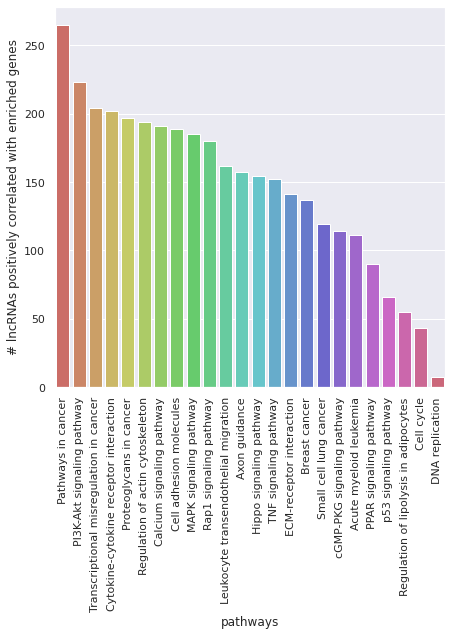

In [36]:
sns.set(rc={'figure.figsize':(7,7)})
ax = sns.barplot(data = df_new,x='term_name',y='count', palette='hls')
ax.set(xlabel='pathways', ylabel='# lncRNAs positively correlated with enriched genes')
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.savefig("BRCA_poscorrelatedonly_pathways_GSEAC6genes.png")

Run  PCAs on brca lncRNAs and protein coding genes


In [62]:
cols_with_subtype

['TCGA-A2-A0EN-01A-13R-A084-07',
 'TCGA-E2-A1IN-01A-11R-A13Q-07',
 'TCGA-E2-A14P-01A-31R-A12D-07',
 'TCGA-AC-A62X-01A-11R-A29R-07',
 'TCGA-A2-A0EP-01A-52R-A22U-07',
 'TCGA-C8-A12Y-01A-11R-A12D-07',
 'TCGA-BH-A0DQ-01A-11R-A084-07',
 'TCGA-BH-A0AY-01A-21R-A00Z-07',
 'TCGA-LD-A66U-01A-11R-A31O-07',
 'TCGA-E2-A1BC-01A-11R-A12P-07',
 'TCGA-AN-A0XW-01A-11R-A109-07',
 'TCGA-A2-A4S3-01A-21R-A266-07',
 'TCGA-A2-A0YI-01A-31R-A10J-07',
 'TCGA-AC-A2B8-01A-11R-A17B-07',
 'TCGA-C8-A133-01A-32R-A12D-07',
 'TCGA-A7-A2KD-01A-31R-A21T-07',
 'TCGA-AO-A1KO-01A-31R-A13Q-07',
 'TCGA-V7-A7HQ-01A-11R-A33J-07',
 'TCGA-BH-A0E0-01A-11R-A056-07',
 'TCGA-BH-A1F8-01A-11R-A13Q-07',
 'TCGA-AN-A0AK-01A-21R-A00Z-07',
 'TCGA-E2-A1IK-01A-11R-A144-07',
 'TCGA-AN-A049-01A-21R-A00Z-07',
 'TCGA-OL-A6VO-01A-12R-A33J-07',
 'TCGA-EW-A1P5-01A-11R-A144-07',
 'TCGA-E9-A3X8-01A-31R-A22U-07',
 'TCGA-AN-A0XT-01A-11R-A109-07',
 'TCGA-AO-A0J4-01A-11R-A034-07',
 'TCGA-A8-A08O-01A-21R-A056-07',
 'TCGA-BH-A0BF-01A-21R-A12P-07',
 'TCGA-C8-

In [44]:
lncRNAs_pathwaylnc = lncRNAs.reindex([x for x in lncRNAs.index if x in lncRNAs_with_pathway ])
lncRNAs_pathwaylnc.shape

NameError: name 'lncRNAs' is not defined

In [629]:
len(lncRNAs_with_pathway)

2860

In [642]:
lncRNAs_pathwaylnc_subtypes = lncRNAs_pathwaylnc[lncRNAs_pathwaylnc.columns.intersection(cols_with_subtype)]
target_subtype.head()

,barcode,sample_type
0,TCGA-A2-A0EN-01A-13R-A084-07,luminalA
1,TCGA-E2-A1IN-01A-11R-A13Q-07,luminalA
2,TCGA-E2-A14P-01A-31R-A12D-07,HER2
3,TCGA-AC-A62X-01A-11R-A29R-07,basallike
4,TCGA-A2-A0EP-01A-52R-A22U-07,luminalA


In [390]:
lncRNAs_subtypes  = lncRNAs[lncRNAs.columns.intersection(cols_with_subtype)]
pc_subtypes       = pc[pc.columns.intersection(cols_with_subtype)]

In [394]:
target_subtype = PCA_target_maker_for_subtypes(lncRNAs_subtypes,sample_metadata_subtypes)
target_subtype = rename_cols(target_subtype,"type","sample_type")

In [594]:
lnc_final_df_nrom.shape

(1215, 3)

In [653]:
lnc_final_df_nrom =  PCA_components(lncRNAs,target)
pc_final_df_nrom  =  PCA_components(pc,target)
lnc_final_df_nrom_pathway =  PCA_components(lncRNAs_pathwaylnc,target)
lnc_final_df_nrom_pathway.head()

,PC1,PC2,PC3,group
0,3.162938,-2.077562,-4.091608,Primary Tumor
1,-2.343208,2.985646,-3.106188,Primary Tumor
2,14.896139,1.760713,-1.476544,Solid Tissue Normal
3,-6.747639,-2.156635,-5.704684,Primary Tumor
4,-0.507649,-7.522486,2.228536,Primary Tumor


In [611]:
lnc_final_df_nrom_pathway

,PC1,PC2,group
0,7.699631,14.613003,Primary Tumor
1,-8.492686,15.741201,Primary Tumor
2,72.632114,6.434551,Solid Tissue Normal
3,-24.264211,15.446068,Primary Tumor
4,14.307898,-36.940683,Primary Tumor
...,...,...,...
1210,33.335199,-39.584533,Primary Tumor
1211,-9.146582,22.623327,Primary Tumor
1212,60.090330,4.542601,Solid Tissue Normal
1213,-15.411844,-13.158894,Primary Tumor


In [654]:
lnc_final_df_nrom_st =  PCA_components(lncRNAs_subtypes,target_subtype)
pc_final_df_nrom_st  =  PCA_components(pc_subtypes,target_subtype)
lnc_final_df_nrom_st_path =  PCA_components(lncRNAs_pathwaylnc_subtypes,target_subtype)


In [381]:
print(lncRNAs.shape)
print(pc.shape)

(2857, 1215)
(7698, 1215)


Plotting PCAs for raw counts and nomalized matrix (Limma) on DE pc and lncRNAs

In [136]:
%pycat plots_functions.py